In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2, Million Metric Tons']

# add a constant term to the independent variables
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     CO2, Million Metric Tons   R-squared:                       0.967
Model:                                  OLS   Adj. R-squared:                  0.967
Method:                       Least Squares   F-statistic:                     2917.
Date:                      Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                              16:24:10   Log-Likelihood:                -2166.0
No. Observations:                       600   AIC:                             4346.
Df Residuals:                           593   BIC:                             4377.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------

X_train shape: (420, 7)
y_train shape: (420,)
X_test shape: (180, 7)
y_test shape: (180,)
Coefficients: [0.00000000e+00 2.48521591e-03 5.36448647e-02 1.23284612e-05
 1.82791126e-02 2.86337578e-02 1.62809980e-02]
Intercept: 43.68515079997451
R² score: 0.9643720211728767
Mean Absolute Error: 7.10559752166532
Mean Squared Error: 75.70568497413824
Root Mean Squared Error: 8.700901388599817


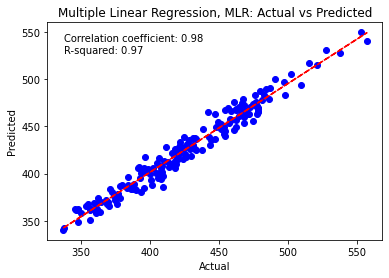

In [3]:

from sklearn.utils import shuffle

# Shuffle data
X, y = shuffle(X, y, random_state = 42)
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Check the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Use the predict method to make predictions on the testing data
y_pred = reg.predict(X_test)

print('=============================================')

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the performance of the model using various metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)


# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("R² score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression, MLR: Actual vs Predicted')

# Annotate statistical parameters on the plot
textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top')

plt.show()
